In [15]:
# !! pip install fancyimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

- 결측치를 보간하는 다양한 방법들을 사각화하여 여러분들이 직접 어떤 식으로 되는구나 이 부분을 이해시키려고 하는 것
- 넘파이에서 랜ㄴ덤으로 데이터 만들어서 시각화

In [10]:
np.random.seed(0)
data = np.random.normal(10,2,100)
df = pd.DataFrame(data, columns=['Feature'])

# 결측치 생성
df.loc[5:10, 'Feature'] = np.nan
df.loc[20:25, 'Feature'] = np.nan
df.loc[40:50, 'Feature'] = np.nan

In [12]:
df[5:10], df[20:25], df[40:50]

(   Feature
 5      NaN
 6      NaN
 7      NaN
 8      NaN
 9      NaN,
     Feature
 20      NaN
 21      NaN
 22      NaN
 23      NaN
 24      NaN,
     Feature
 40      NaN
 41      NaN
 42      NaN
 43      NaN
 44      NaN
 45      NaN
 46      NaN
 47      NaN
 48      NaN
 49      NaN)

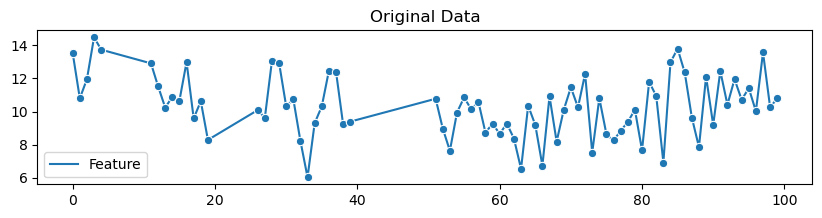

In [13]:
plt.figure(figsize=(10,2))
sns.lineplot(data=df, marker='o')
plt.title('Original Data')
plt.show()

In [17]:
# 1차 선형 보간법, interpolate
df_linear = df.interpolate(method = 'linear')

# 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method = 'quadratic')

# 3 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns = ['Feature'])

# 4.0값을 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero = df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=['Feature'])

# 6. MICE 다중대치법
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=['Feature'])

In [18]:
df_quadratic[5:10]

,Feature
5,12.896779
6,12.636320
7,12.953739
8,13.704268
9,14.019296


Text(0.5, 1.0, 'df_mice')

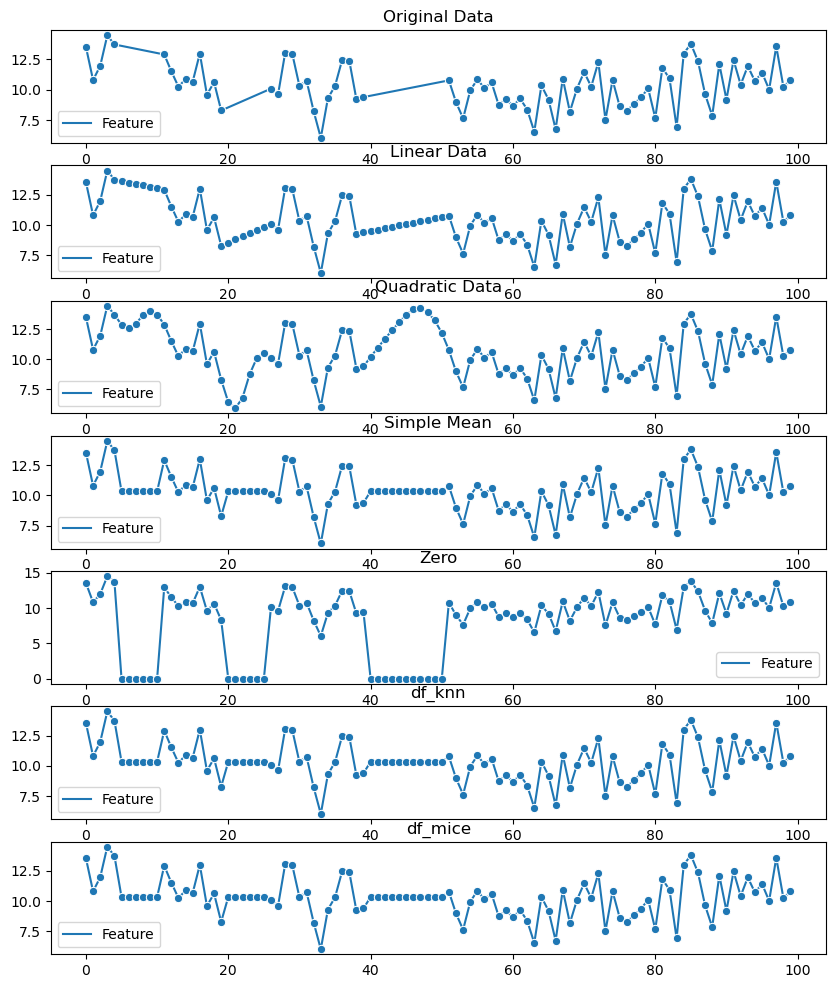

In [19]:
# 시각화
fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

- 결측치를 보간함으로써, 데이터 분석/모델링을 하면서 평가지표를 확인하여 적절한 보간법을 선정할 수 있다.